# Price Prediction Of Diamonds: Regression

## Table of contents

* [Introduction](#Introduction)
* [Data_wrangling](#Data_wrangling)
* [Exploratory_Data_analysis](#Exploratory_Data_analysis)
* [Model_building](#Model_building)
* [Conclusions](#Conclusion)

## Introduction

### About Dataset

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

Feature description:

price price in US dollars (326 -- 18,823)This is the target column containing tags for the features. 

The 4 Cs of Diamonds:-

**carat** (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

**cut** (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

**color**, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

**clarity** (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.

**depth**, total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

**table** width of the top of the diamond relative to widest point (43--95)
A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.

Dimensions

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)



<img src="The-Diamond-4Cs.jpg" width="800" height="400" align="center"/>

In [1]:
## Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data

df=pd.read_csv('diamonds.csv')

## Data_wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# checking for duplicates

df[df.duplicated()]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


In [6]:
df.duplicated().sum().all()

False

In [7]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Checking for outliers in numerical columns.

This is a function that takes a column and sort it's values and calculate it's IQR,Q1,Q2 and applies the
outliers rule that returns the extremly higher and lower values that we should eliminate from our dataset to improve our model
accuracy.

I will apply this function to the features i am willing to use in my Linear regression model.

In [8]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [9]:
outlier_treatment(df['depth'])

(58.75, 64.75)

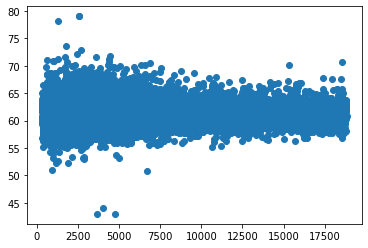

In [10]:
plt.scatter(x='price',y='depth',data=df);

In [11]:
outlier_treatment(df['table'])

(51.5, 63.5)

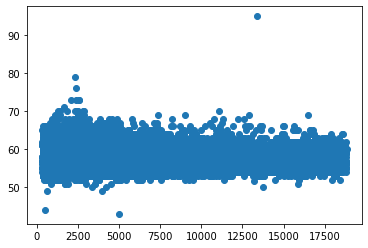

In [12]:
plt.scatter(x='price',y='table',data=df);

In [13]:
outlier_treatment(df['x'])

(1.9649999999999999, 9.285)

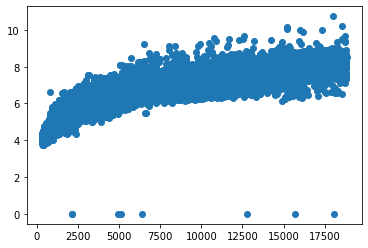

In [14]:
plt.scatter(x='price',y='x',data=df);

In [15]:
outlier_treatment(df['y'])

(1.9899999999999993, 9.27)

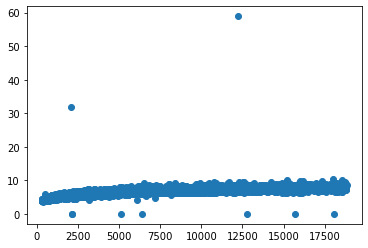

In [16]:
plt.scatter(x='price',y='y',data=df);

In [17]:
outlier_treatment(df['z'])

(1.2150000000000003, 5.734999999999999)

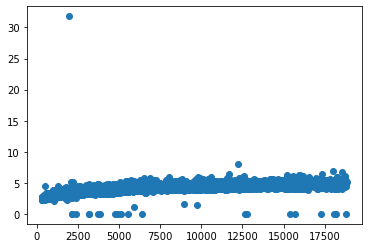

In [18]:
plt.scatter(x='price',y='z',data=df);

Checking categorical columns to find out wether their values are repeated with different names

In [19]:
#gathe
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['cut', 'color', 'clarity']

In [20]:
#checking for duplicated values in the categorical columns befor including them into our model
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64



### Observations

1. Data consists of 53940 rows and 11 columns
2. There are no null values in the data
3. There are no duplicated rows in the data
4. Dimension columns x,y,z contains (0) values which doesn't make any sense
5. There are some outliers in the features i am willing to use in my Linear regression model which will affect it's accuracy
6. It seems that the categorical values are unique and not repeated in other forms

## Data_cleaning

**First**, i will drop the unnamed column

In [21]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

**Second**, i noticed that the dimensions columns (x,y,z) has zero values which is wrong values and will affect my model so i will
drop these columns from my dataset

In [22]:
df.drop(df[df['x']==0].index,inplace=True) 
df.drop(df[df['y']==0].index,inplace=True)
df.drop(df[df['z']==0].index,inplace=True)

**Third**,I will remove the outliers in the following columns (Depth,Table,X,Y,Z)

In [23]:
df=df[(df['depth']>49) & (df['depth']<75)]#[(df['depth']>49) & (df['depth']<75)]
df=df[(df['table']>50) & (df['table']<70)]#[(df['table']>50) & (df['table']<70)]
df=df[(df['x']>2.8) & (df['x']<70)]#[(df['x']>2.8) & (df['x']<70)]
df=df[(df['y']>2) & (df['y']<15)]#[(df['y']>2) & (df['y']<15)]
df=df[(df['z']>1.2) & (df['z']<5.7)]#[(df['z']>1.2) & (df['z']<5.7)]

**Fourth**,I will convert the categorical columns with the label encoder function to include them in my model to give me a better accuracy using label encoder function since it is an ordinal column which means that it has rank and order

In [24]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()

In [25]:
    df['cut']=label_encoder.fit_transform(df['cut'])
df['color']=label_encoder.fit_transform(df['color'])
df['clarity']=label_encoder.fit_transform(df['clarity'])

In [26]:
# data frama after transforming the categorical using label encoder

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [27]:
# checking final results

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53861 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53861 non-null  float64
 1   cut      53861 non-null  int32  
 2   color    53861 non-null  int32  
 3   clarity  53861 non-null  int32  
 4   depth    53861 non-null  float64
 5   table    53861 non-null  float64
 6   price    53861 non-null  int64  
 7   x        53861 non-null  float64
 8   y        53861 non-null  float64
 9   z        53861 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.9 MB


## Exploratory_Data_analysis

<img src="Hero -- Colour Diamonds.png" width="800" height="400" align="center"/>

In [28]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53861.000000,53861.000000,53861.000000,53861.000000,53861.000000,53861.000000,53861.000000,53861.000000,53861.000000,53861.000000
mean,0.796314,2.554798,2.592989,3.837248,61.748796,57.453144,3925.592915,5.729547,5.731456,3.538055
std,0.470147,1.025895,1.700907,1.723526,1.416773,2.211496,3980.610985,1.116611,1.108603,0.689375
min,0.200000,0.000000,0.000000,0.000000,50.800000,50.100000,326.000000,3.730000,3.680000,1.410000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.520000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5317.000000,6.540000,6.540000,4.030000
max,3.050000,4.000000,6.000000,7.000000,73.600000,69.000000,18823.000000,9.540000,9.460000,5.690000


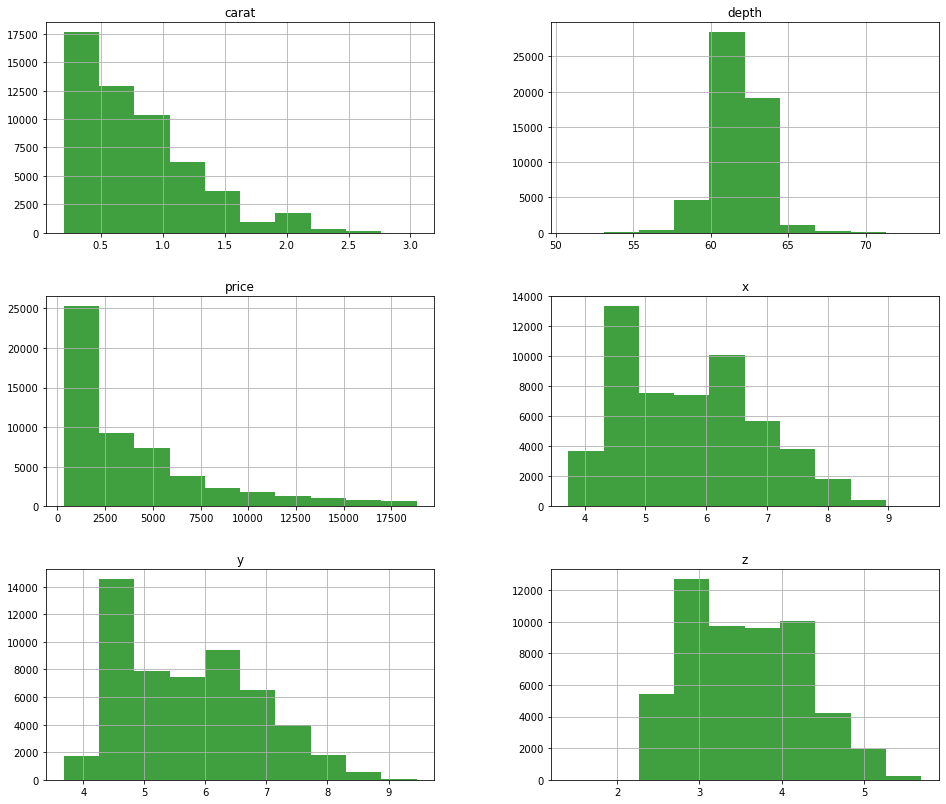

In [29]:
#plotting a histogram for numerical data

df.hist(['carat','depth','price','x','y','z'],layout=(5,2),figsize=(16,24),alpha=0.75,facecolor='g');

Observations

1. Carat is more concentrated from 0.2 to 0.5 and it degrades until t reaches 2.0
2. depth is concentrated mostly between 60 and 64 mm
3. Price is concentrated mostly from 326 to 2400
4. x whih is the lenght is concentrated mostly from 4.5 to 5 and the rest of the data fluctuates until it reaches 9 at somepoints
5. y which is the depth is concentrated mostly between 4 and 4.9 mm and fluctuates until it reaches 9 at some points
6. z which is the width is concentrated from 2.5 to 3.2 mm and dectreases at 3.3 until it reacehs 5 mm and 5.5 at some points

In [30]:
#plotting a headmap to check the correlaton between data

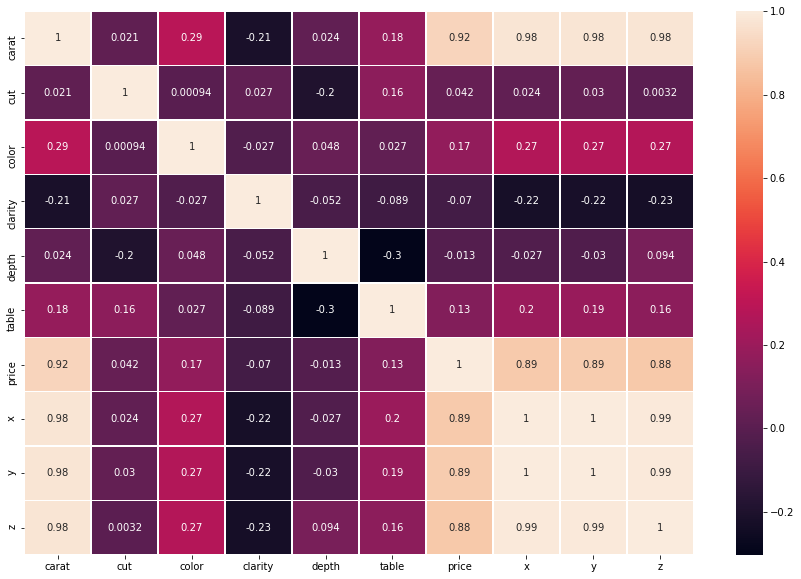

In [31]:
plt.figure(figsize=(15,10));
sns.heatmap(df.corr(),annot=True,linewidths=0.5);

Observation
Strong correlation

1. price and carat,x,y,z
2. carat and x,y,z
3. x,y,z

There are no worth noticing moderate correlations between variables

## Model_building

In [32]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [33]:
# Assign x features

x=df[['carat','cut','color','clarity','depth','table','x', 'y','z']]

In [34]:
#assigning target column

y=df['price']

In [35]:
# splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [36]:
# importing the model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

#### Using Linear regression model

In [37]:
# fit the linear regression model

lm.fit(X_train,y_train)

LinearRegression()

In [38]:
#model coeffient

lm.coef_

array([12052.03993838,    51.55638171,  -277.2511999 ,   281.66579863,
         -47.84656321,   -91.70205756, -2560.31417662,  2209.90297284,
       -1932.87256676])

In [39]:
# coeffients dataframe

cdf=pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])
cdf

,Coeff
carat,12052.039938
cut,51.556382
color,-277.251200
clarity,281.665799
depth,-47.846563
table,-91.702058
x,-2560.314177
y,2209.902973
z,-1932.872567


In [40]:
#predict diamond prices

predictions=lm.predict(X_test)

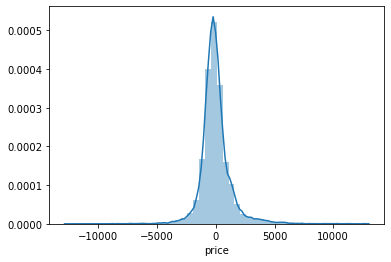

In [41]:
sns.distplot(y_test-predictions);

It is showing a normally distributed plot which means that my predctions are close to the test values

In [42]:
# checking Evaluation metrics

from sklearn import metrics

In [43]:
metrics.mean_absolute_error(y_test,predictions)

831.955842210712

In [44]:
metrics.mean_squared_error(y_test,predictions)

1627714.2012443328

In [45]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

1275.8190315418299

In [49]:
# R2 means that the model explained 89% of the model variance

r2=metrics.explained_variance_score(y_test,predictions)
r2

0.8936167186643729

#### Using Random Forest Regressor model

In [47]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
predictionsRF=RF.predict(X_test)

In [53]:
metrics.mean_absolute_error(y_test,predictionsRF)

269.349233501749

In [55]:
metrics.mean_squared_error(y_test,predictionsRF)

311172.31597851973

In [57]:
np.sqrt(metrics.mean_squared_error(y_test,predictionsRF))

557.828213680986

In [59]:
r2=metrics.explained_variance_score(y_test,predictionsRF)
r2

0.9796674570270903

## Conclusions

1. Data consisted of 53940 rows and 11 columns
2. There were no null values in the data
3. There were no duplicated rows in the data
4. Dimension columns x,y,z contained some (0) values whch we dropped them from the dataset
5. There were some outliers in the features which we removed them
6. categorical values were unique and not repeated in other forms
7. Linear regression mean_absolute_error was estimated by 832
8. Linear regression mean_squared_error was estimed by 1627714
9. Linear regression mean_squared_error was estimated by 1276
10. Linear regression R2 of the model is 89%
11. RandomForestRegressor mean_absolute_error was estimated by 270
12. RandomForestRegressor mean_squared_error was estimed by 311172
13. RandomForestRegressor mean_squared_error was estimated by 557
14. RandomForestRegressor R2 of the model is 98%